# WINE CLASS CLASSIFICATION

This notebook looks into use Python-based Machine Learning and Data Science libraries in an attempt to build a Machine Learning model capable of predicting a wine class based on the given attributes

I'm going to take the following steps:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling

## 1. Problem Definition

In a statement,
> Given a wine classification parameters about some wines, can i predict the right class for a new wine?

## 2. Data

The original dataset came from UCI Machine Learning Repository - https://archive.ics.uci.edu/dataset/109/wine

There is also a version of it available on Kaggle - https://www.kaggle.com/competitions/wine-m

## 3. Evaluation

> If we reach 95% of accuracy at predicting the right class for an unknown wine during the proof of concept, i'll pursue the project

## 4. Features

1. Attribute Information:
    * 1) Alcohol
    * 2) Malic acid
    * 3) Ash
    * 4) Alcalinity of ash
    * 5) Magnesium
    * 6) Total phenols
    * 7) Flavanoids
    * 8) Nonflavanoid phenols
    * 9) Proanthocyanins
    * 10) Color intensity
    * 11) Hue
    * 12) OD280/OD315 of diluted wines
    * 13) Proline
    
2. target:
    * class_0
    * class_1
    * class_2

## 5. Modelling

For this kind of problem i followed across the sklearn model map - https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

To perform the classification task i will:

* Use Decision Tree Classifiers
* Use RandomForestClassifier
* Use Support Vector Classification

**Preparing the Tools**

In [19]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay, roc_curve, auc


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%config IPCompleter.use_jedi = False
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

**Load the Datasets**

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [3]:
train_df.head()

,id,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0,13.05,0.40,2.40,21.68,71.79,2.33,1.87,0.09,1.30,1.070000,1.13,2.45,96.79,1
1,1,13.01,3.66,2.21,16.53,98.87,2.46,2.34,0.28,1.49,3.690000,0.75,2.79,588.86,0
2,2,13.13,1.14,2.32,18.75,108.51,2.63,2.26,0.13,2.15,5.030000,0.86,2.66,954.80,0
3,3,12.06,1.41,2.04,16.58,73.52,0.84,-0.36,0.37,0.14,7.869999,0.37,1.01,194.88,2
4,4,12.35,1.14,1.91,19.52,77.65,2.09,1.98,0.27,1.03,4.620000,1.11,3.46,502.23,1


In [4]:
train_df.shape, test_df.shape

((534, 15), (178, 14))

In [5]:
# Verifying if the DataFrame has some missing values
train_df.isna().sum()

id                              0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [6]:
# Verifying if the DataFrame has some duplicated rows
train_df[train_df.duplicated()]

,id,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


The dataset is perfectly clean as i don't have any missing values or duplicates.

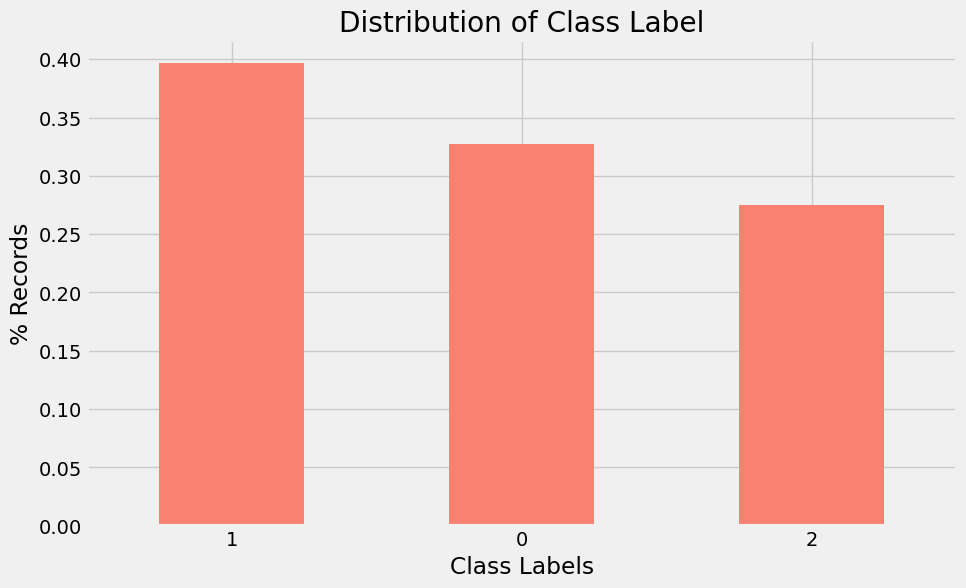

In [7]:
# Let's look how our data is spread among the classes
(train_df.target.value_counts()/train_df.shape[0]).plot(kind="bar", color="salmon")
plt.title("Distribution of Class Label")
plt.xlabel("Class Labels")
plt.ylabel("% Records")
plt.xticks(rotation=0);

The problem is not perfectly balacend according to the distribution of class labels (40%/33%/27%)

In [8]:
train_df.dtypes

id                                int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

Our data has only numeric values, we're not going to need the OneHotEncoder

In [9]:
train_df.describe()

,id,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,266.500000,12.596404,1.803371,2.233783,17.876180,92.548633,1.996723,1.534307,0.302210,1.305693,3.889401,0.852569,2.266685,592.646629,0.947566
std,154.296792,0.839504,1.129380,0.285172,3.376112,14.859507,0.652526,1.047399,0.127285,0.614343,2.349626,0.243022,0.740055,333.830211,0.775482
min,0.000000,10.400000,-0.270000,1.150000,7.990000,57.020000,0.630000,-0.490000,0.020000,-0.150000,-0.370000,0.350000,0.640000,9.800000,0.000000
25%,133.250000,11.920000,0.952500,2.050000,15.800000,81.322500,1.470000,0.555000,0.210000,0.892500,2.062500,0.680000,1.612500,352.725000,0.000000
50%,266.500000,12.605000,1.450000,2.230000,17.760000,90.840000,1.995000,1.590000,0.280000,1.260000,3.680000,0.870000,2.405000,521.920000,1.000000
75%,399.750000,13.240000,2.587500,2.430000,19.877500,100.627500,2.510000,2.387500,0.397500,1.640000,5.080000,1.030000,2.830000,807.565000,2.000000
max,533.000000,14.690000,5.570000,3.200000,28.740000,159.460000,3.840000,4.350000,0.620000,3.440000,12.800000,1.690000,3.900000,1654.830000,2.000000


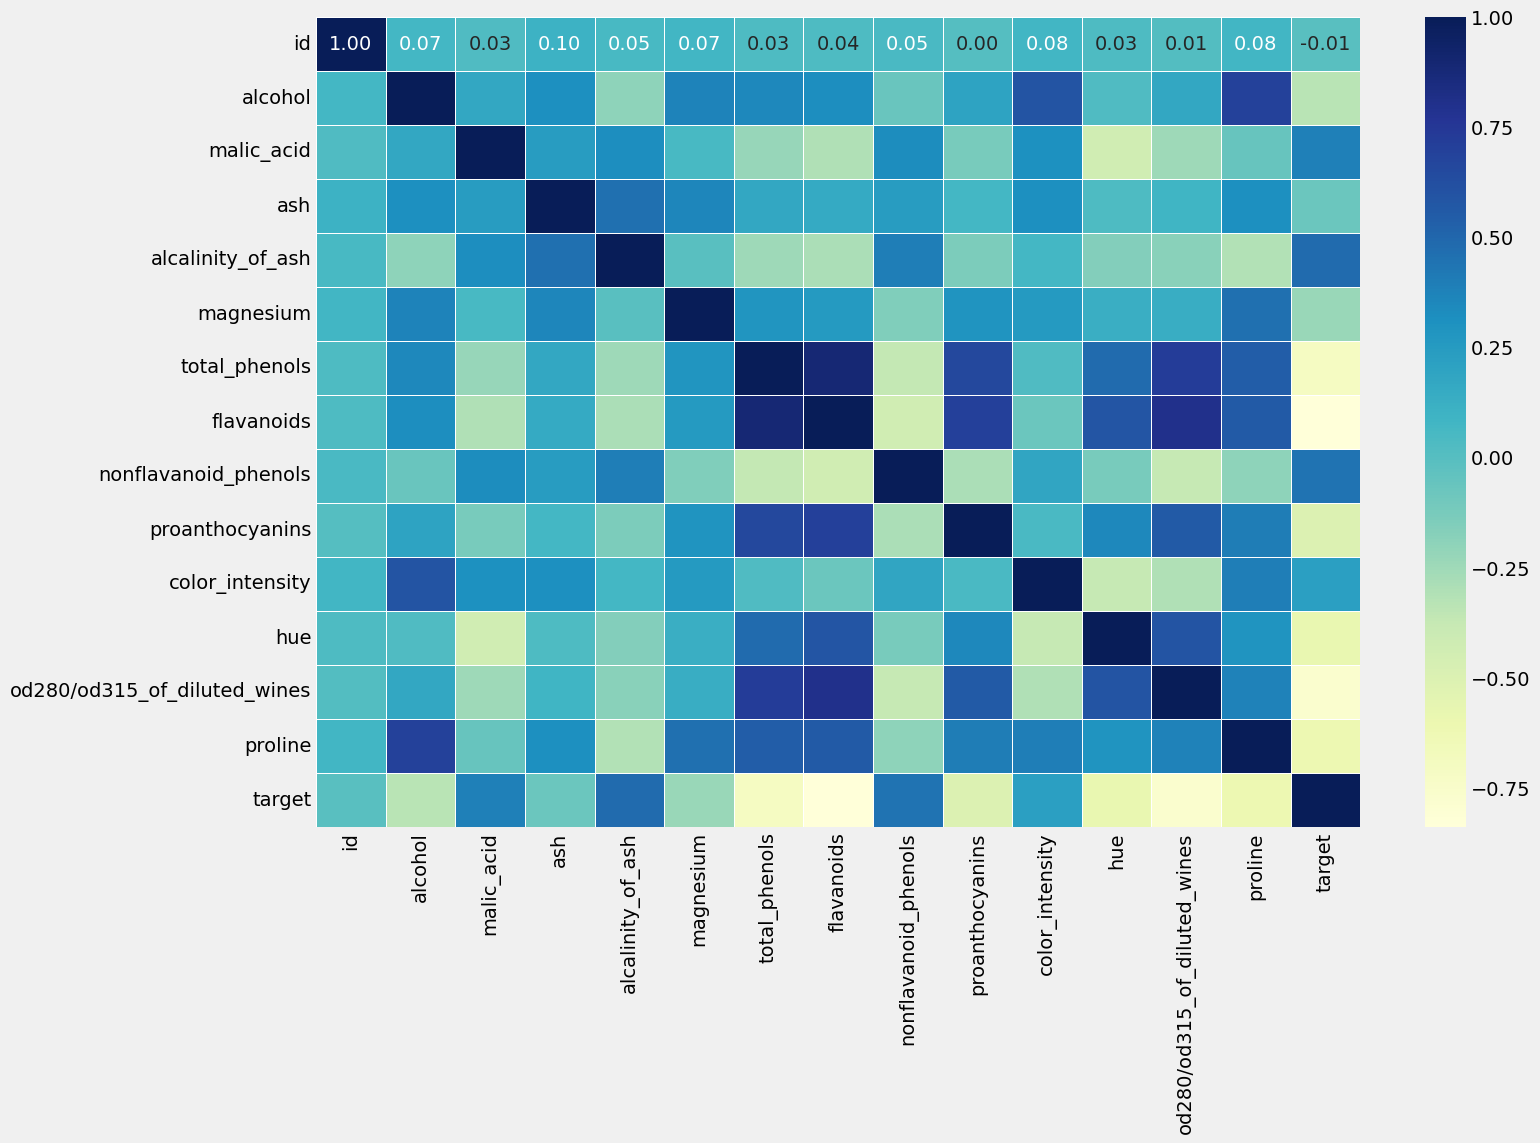

In [10]:
# Let's look closely into the correlation between our features to find which of them we can analyse with sense
correlation_matrix = train_df.corr(method="pearson")
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")
plt.plot();

In [11]:
correlation_matrix

,id,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
id,1.000000,0.071514,0.025120,0.102973,0.053868,0.074817,0.033354,0.035635,0.049883,0.002055,0.079853,0.034722,0.011462,0.079218,-0.007620
alcohol,0.071514,1.000000,0.168536,0.312008,-0.194914,0.370049,0.350235,0.319261,-0.069657,0.196324,0.595480,0.028220,0.169446,0.698223,-0.332572
malic_acid,0.025120,0.168536,1.000000,0.243477,0.320158,0.052141,-0.222386,-0.306356,0.327968,-0.125351,0.309332,-0.429475,-0.246543,-0.062275,0.387513
ash,0.102973,0.312008,0.243477,1.000000,0.460577,0.360531,0.173617,0.158231,0.244708,0.071027,0.315031,0.030450,0.083890,0.312372,-0.076814
alcalinity_of_ash,0.053868,-0.194914,0.320158,0.460577,1.000000,-0.011193,-0.243525,-0.288726,0.390475,-0.135188,0.067720,-0.160438,-0.179043,-0.312577,0.481300
magnesium,0.074817,0.370049,0.052141,0.360531,-0.011193,1.000000,0.282174,0.258570,-0.153456,0.289099,0.254163,0.125221,0.134195,0.455026,-0.228591
total_phenols,0.033354,0.350235,-0.222386,0.173617,-0.243525,0.282174,1.000000,0.885744,-0.368771,0.661651,0.030106,0.482501,0.720271,0.545432,-0.708990
flavanoids,0.035635,0.319261,-0.306356,0.158231,-0.288726,0.258570,0.885744,1.000000,-0.434910,0.703862,-0.073014,0.589939,0.803087,0.555375,-0.838853
nonflavanoid_phenols,0.049883,-0.069657,0.327968,0.244708,0.390475,-0.153456,-0.368771,-0.434910,1.000000,-0.288005,0.183233,-0.125860,-0.376708,-0.195339,0.446140
proanthocyanins,0.002055,0.196324,-0.125351,0.071027,-0.135188,0.289099,0.661651,0.703862,-0.288005,1.000000,0.044835,0.349241,0.560263,0.397933,-0.505382


Now i'll split our train dataset for cross-validation

In [12]:
np.random.seed(0)

x = train_df.drop("target", axis=1)
y = train_df["target"]
test_size = 0.2
random_state = 99

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

### Decision Tree Classifier

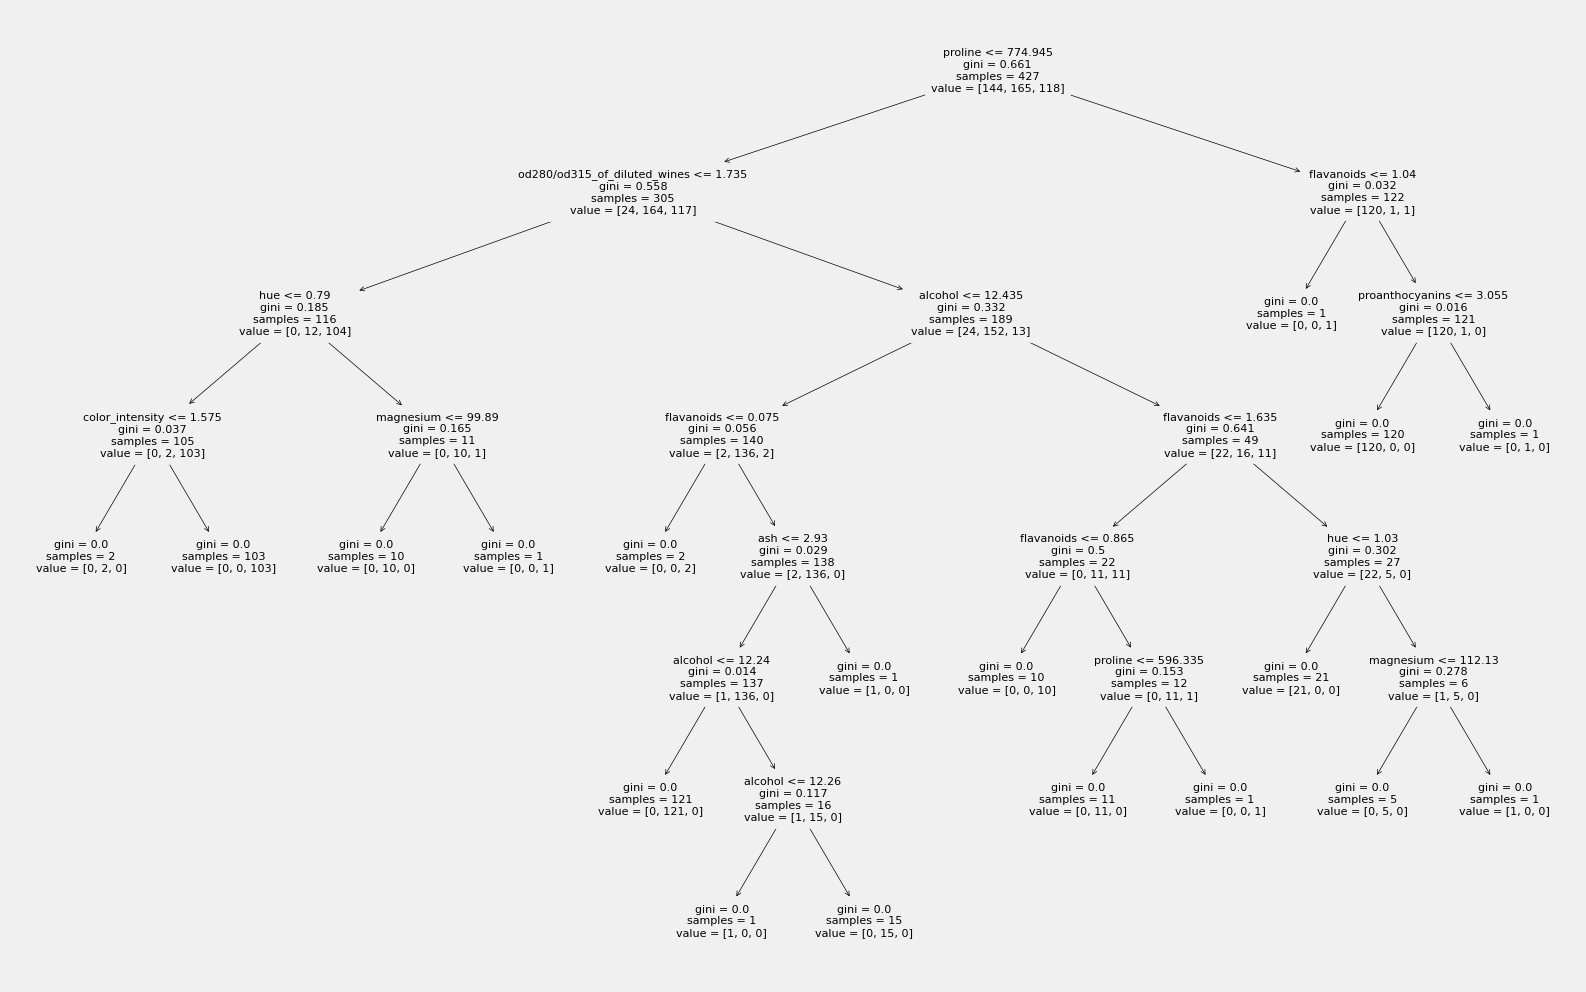

In [13]:
decision_clf = DecisionTreeClassifier(random_state=random_state)
decision_clf.fit(x_train, y_train)
fig, ax = plt.subplots(figsize=(18, 12))
plot_tree(decision_clf, ax=ax, fontsize=8, feature_names=list(x.columns));

In [14]:
y_pred = decision_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.98      0.89      0.93        47
           2       0.97      1.00      0.98        29

    accuracy                           0.94       107
   macro avg       0.94      0.95      0.95       107
weighted avg       0.95      0.94      0.94       107



### Random Forest Classifier

In [15]:
grid = {
    "n_estimators": np.arange(10, 150, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_leaf": np.arange(1, 20, 2),
    "min_samples_split": np.arange(2, 20, 2),
    "max_features": [None, "sqrt", "log2"]
}

np.random.seed(0)

random_forest_clf = GridSearchCV(RandomForestClassifier(), 
                                 param_grid=grid, 
                                 cv=5,
                                 verbose=True,
                                 n_jobs=-1)

random_forest_clf.fit(x_train, y_train);

Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


In [16]:
random_forest_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 110}

In [17]:
np.random.seed(0)

y_pred = random_forest_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.94      0.96      0.95        47
           2       1.00      1.00      1.00        29

    accuracy                           0.95       107
   macro avg       0.96      0.95      0.96       107
weighted avg       0.95      0.95      0.95       107



In [18]:
rfc = RandomForestClassifier(** random_forest_clf.best_params_)
acc = cross_val_score(rfc, x, y, cv=5, scoring="accuracy")
acc.mean()

0.9774995591606418

The accuracy for this simple problem is pretty good, around 97.75%. We are able to achieve a score much higher than we estimate on the evaluation.

### Support Vector Classification

In [21]:
np.random.seed(0)
clf_svc = make_pipeline(StandardScaler(), SVC(random_state=random_state))
clf_svc.fit(x_train, y_train)
y_pred = clf_svc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        29

    accuracy                           1.00       107
   macro avg       1.00      1.00      1.00       107
weighted avg       1.00      1.00      1.00       107



SVC is predicting the lables with maximum accuracy.

**Comparing Models**

In [26]:
models = {
    "Decision Tree Classifier": decision_clf,
    "Random Forest Classifier": rfc,
    "Support Vector Classification": clf_svc
}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluate given Machine Learning Models
    models: a dict of different ML models
    x_train: a training data - no labels
    x_test: a test data - no labels
    y_train: training labels
    y_test: testing lables
    """

    np.random.seed(0)

    model_score = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_score[name] = model.score(x_test, y_test)
    return model_score

model_score = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)

model_score

{'Decision Tree Classifier': 0.9439252336448598,
 'Random Forest Classifier': 0.9532710280373832,
 'Support Vector Classification': 1.0}

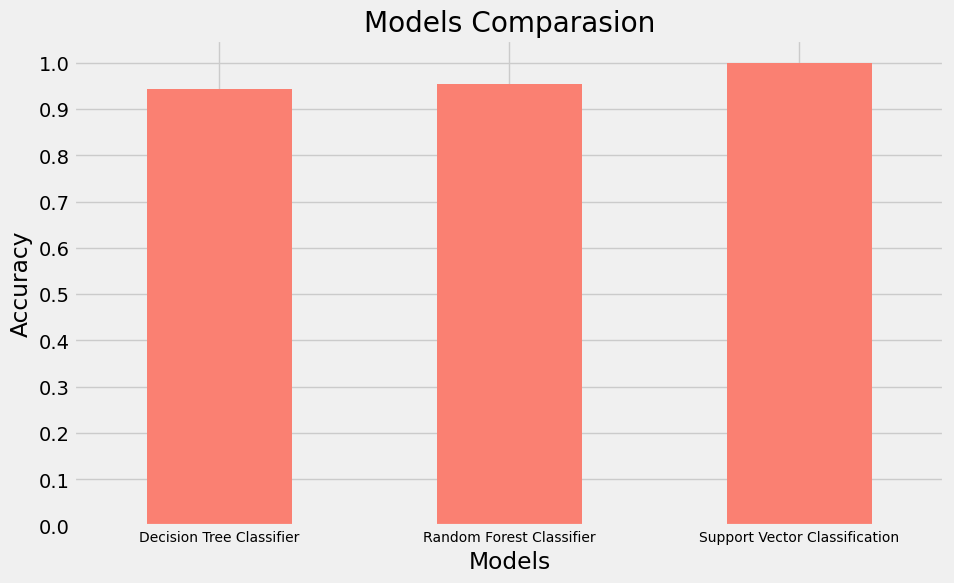

In [31]:
model_compare = pd.DataFrame(model_score, index=["accuracy"])
model_compare.T.plot(kind="bar", color="salmon", legend=False)

plt.title("Models Comparasion")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(rotation=0, fontsize=10);

The best model we've made is the Support Vector Classification (SVC) with 100% of accuracy.

Random Forest Classifier was the second better with 95.33% of accuracy.

Decision Tree Classifier was the third better with 94.40% of accuracy.

For this reason we'll export the SVC model to use and share with others at the end.

In [33]:
np.random.seed(0)
y_out = clf_svc.predict(test_df)

In [34]:
pd.DataFrame(y_out, columns=["target"]).to_csv("data/from_svc.csv", index_label="id")

In [36]:
svc_predictions_test_df = pd.read_csv("data/from_svc.csv")
svc_predictions_test_df.head()

,id,target
0,0,2
1,1,1
2,2,2
3,3,0
4,4,2


**Exporting our Model**

In [41]:
import sys
!conda install --yes --prefix {sys.prefix} joblib

import joblib
joblib.dump(clf_svc, "models/svc_model.joblib")

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



['models/svc_model.joblib']